In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import os 
import scipy.io as sio

import glob
from PIL import Image
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [8]:
data_dir = "../../data/"

In [9]:
max_exp_id = len(os.listdir(data_dir))
exp_id = 4

file = f"Fly{exp_id}.mat"
data = sio.loadmat(data_dir + file)
print(f"loaded file {file}")
X, Y, R = data["X"], data["Y"], data["R"]
O = np.where(X == 1)[1]
Y = np.squeeze(Y)
R = np.squeeze(R)
num_trials = np.sum(Y)
assert num_trials == R.shape[0], "Y and R should have the same number of trials"

# remove last element, and append left to get indices.
indices = np.cumsum(Y)
indices = np.insert(indices, 0, 0)
indices = np.delete(indices, -1)

exp_decisions = [[] for _ in range(num_trials)]
exp_odors = [[] for _ in range(num_trials)]

for index, decision, odor in zip(indices, Y, O):
    exp_decisions[index].append(decision)
    exp_odors[index].append(odor)
    
trial_lengths = [len(exp_decisions[i]) for i in range(num_trials)]
max_trial_length = np.max(np.array(trial_lengths))

rewards = R
print("odors: \n", exp_odors[:15])
choices = [trial_odors[-1] for trial_odors in exp_odors]
print("choices: \n", choices[:15])
num_trials = len(choices)
print("num trials: ", num_trials)

loaded file Fly4.mat
odors: 
 [[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0], [0, 1, 0, 1, 0, 1, 0, 1, 1], [0], [1, 0, 1, 1, 1, 1], [1, 0, 1, 0], [1, 0], [0, 0, 1], [1], [0, 1], [0], [0], [1], [1, 0], [0]]
choices: 
 [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
num trials:  238


In [10]:
expdata = {}
expdata["A"] = np.cumsum(np.logical_not(choices))
expdata["B"] = np.cumsum(choices)
assert expdata["A"][-1] + expdata["B"][-1] == num_trials
df = pd.DataFrame.from_dict(expdata)

limits: 138


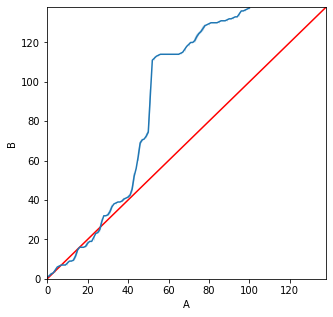

In [12]:
plt.figure(figsize=(5, 5))
limits = max(expdata["A"][-1], expdata["B"][-1])
print(f"limits: {limits}")
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.plot([0, limits], [0, limits], color='red')
sns.lineplot(data=df, x="A", y="B")

plt.show()